In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [ ]:
#K-means is an unsupervised machine learning algorithm that groups a dataset into a specified number (\(k\)) of clusters by partitioning each data point to the cluster with the nearest mean (centroid).

In [3]:
df=pd.read_csv("customer_segmentation.csv")


In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
#ID:** Customer's unique identifier
# **Year_Birth:** Customer's birth year
# **Education:** Customer's education level
# **Marital_Status:** Customer's marital status
# **Income:** Customer's yearly household income
# **Kidhome:** Number of children in customer's household
# **Teenhome:** Number of teenagers in customer's household
# **Dt_Customer:** Date of customer's enrollment with the company
# **Recency:** Number of days since customer's last purchase
# **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise
# **MntWines:** Amount spent on wine in last 2 years
# **MntFruits:** Amount spent on fruits in last 2 years
# **MntMeatProducts:** Amount spent on meat in last 2 years
# **MntFishProducts:** Amount spent on fish in last 2 years
# **MntSweetProducts:** Amount spent on sweets in last 2 years
# **MntGoldProds:** Amount spent on gold in last 2 years
# **NumDealsPurchases:** Number of purchases made with a discount
# **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
# **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
# **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
# **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
# **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
# **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise
# **NumWebPurchases:** Number of purchases made through the company’s website
# **NumCatalogPurchases:** Number of purchases made using a catalogue
# **NumStorePurchases:** Number of purchases made directly in stores
# **NumWebVisitsMonth:** Number of visits to company’s website in the last month"""

In [7]:
df.shape

(2240, 29)

In [ ]:
df.info()# this is my project

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.isna().sum().sum()

np.int64(24)

In [10]:
df.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [11]:
df.isna().sum().sum()

np.int64(24)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum().sum()

np.int64(0)

In [14]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [15]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [16]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [17]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],dayfirst=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [19]:
df["Age"]=2025-df["Year_Birth"]

In [20]:
df["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [21]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [22]:
df["Total_Children"]=df["Kidhome"]+df["Teenhome"]

In [23]:
df["Total_Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [24]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [25]:
spend_cols=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]

In [26]:
df["Total_Spending"]=df[spend_cols].sum(axis = 1)

In [27]:
df[["Total_Spending"]]

,Total_Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [28]:
df["Customer_Since"]=(pd.Timestamp("today")-df["Dt_Customer"]).dt.days

In [29]:
df["Customer_Since"]

0       4824
1       4274
2       4473
3       4300
4       4322
        ... 
2235    4542
2236    4180
2237    4316
2238    4317
2239    4783
Name: Customer_Since, Length: 2216, dtype: int64

In [30]:
#histogram

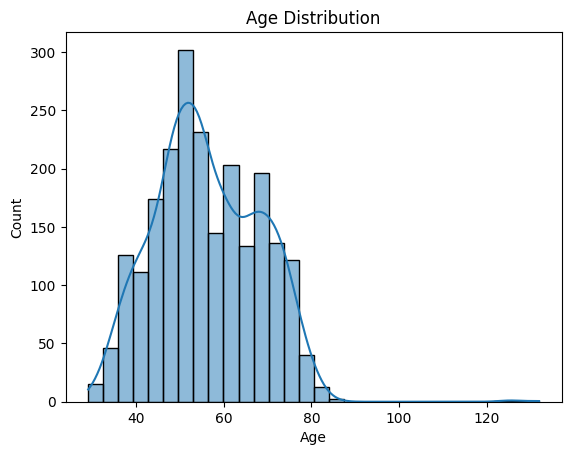

In [31]:
sns.histplot(df["Age"],bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

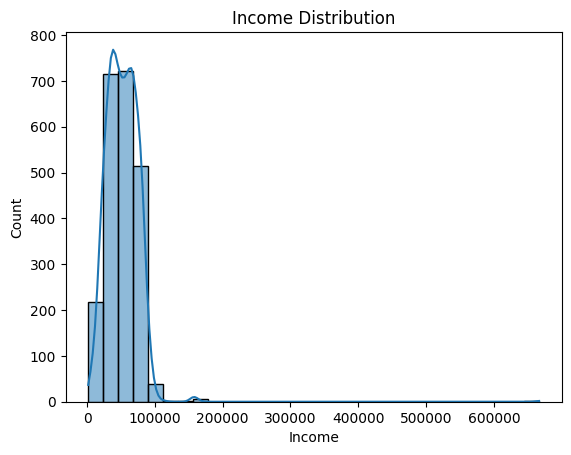

In [32]:
sns.histplot(df["Income"],bins=30, kde=True)
plt.title("Income Distribution")
plt.show()

Text(0.5, 1.0, 'Total Spending Distribution')

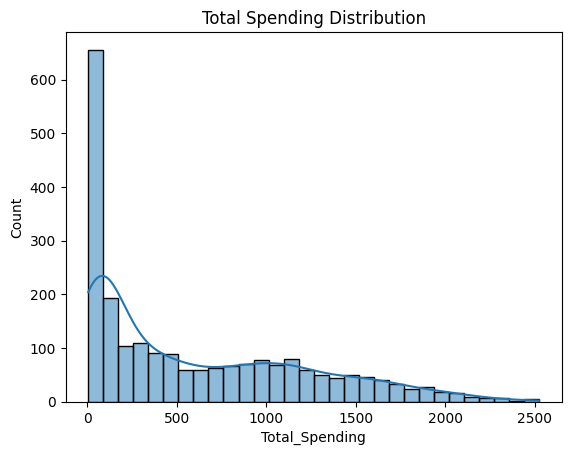

In [33]:
sns.histplot(df["Total_Spending"], bins=30,kde=True)
plt.title("Total Spending Distribution")

In [34]:
#boxplot

Text(0.5, 1.0, 'Income by Education Level')

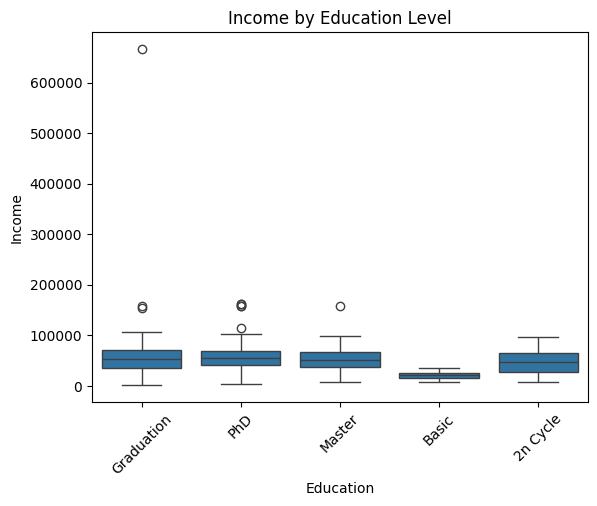

In [35]:
sns.boxplot(x="Education", y="Income",data=df)
plt.xticks(rotation=45)
plt.title("Income by Education Level")

Text(0.5, 1.0, 'Spending by MArtial Status')

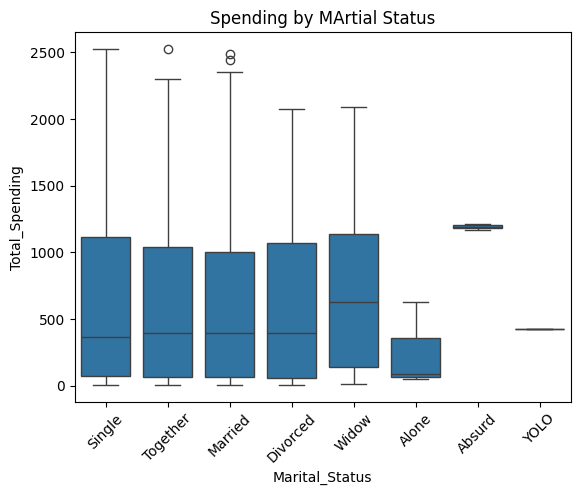

In [36]:
sns.boxplot(x="Marital_Status", y="Total_Spending",data=df)
plt.xticks(rotation=45)
plt.title("Spending by MArtial Status")

In [37]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [38]:
corr=df[["Income","Age","Recency","Total_Spending","NumWebPurchases","NumStorePurchases"]].corr()

In [39]:
corr

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


In [40]:
# heatmap

Text(0.5, 1.0, 'Correlation Matrix')

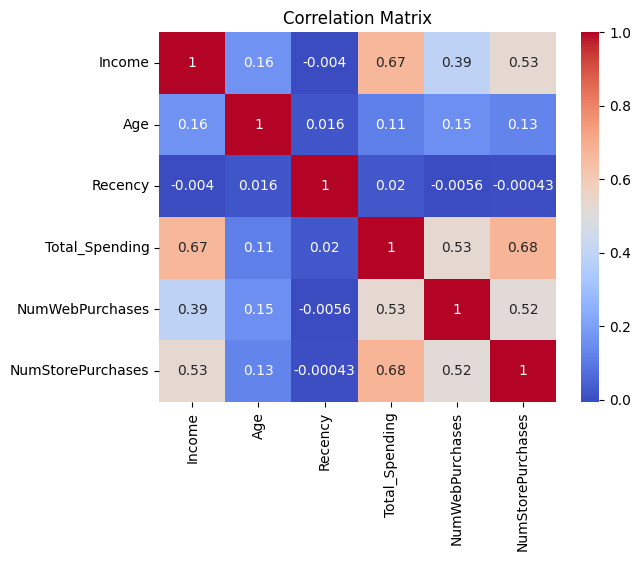

In [41]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

In [42]:
import pandas as pd

numeric_cols = ['Income', 'Recency', 'SpendingScore'] 
existing_cols = [col for col in numeric_cols if col in df.columns]
print("Using these columns for correlation:", existing_cols)

dataframe = df[existing_cols]
dataframe = dataframe.fillna(dataframe.mean())
matrix = dataframe.corr()
print("\nDataframe used for correlation:\n", dataframe.head())
print("\nCorrelation matrix:\n", matrix)


Using these columns for correlation: ['Income', 'Recency']

Dataframe used for correlation:
     Income  Recency
0  58138.0       58
1  46344.0       38
2  71613.0       26
3  26646.0       26
4  58293.0       94

Correlation matrix:
           Income  Recency
Income   1.00000 -0.00397
Recency -0.00397  1.00000


In [43]:
import pandas as pd

# Select all numerical columns automatically
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print("Using these columns for correlation:", numeric_cols)

dataframe = df[numeric_cols]
dataframe = dataframe.fillna(dataframe.mean())
matrix = dataframe.corr()

print("\nDataframe used for correlation:\n", dataframe.head())
print("\nCorrelation matrix:\n", matrix)


Using these columns for correlation: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Total_Children', 'Total_Spending', 'Customer_Since']

Dataframe used for correlation:
      ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94    

In [44]:
pivot_income=df.pivot_table(values="Income", index="Education",columns="Marital_Status",aggfunc="mean")

In [45]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Income by Education and Marital Status')

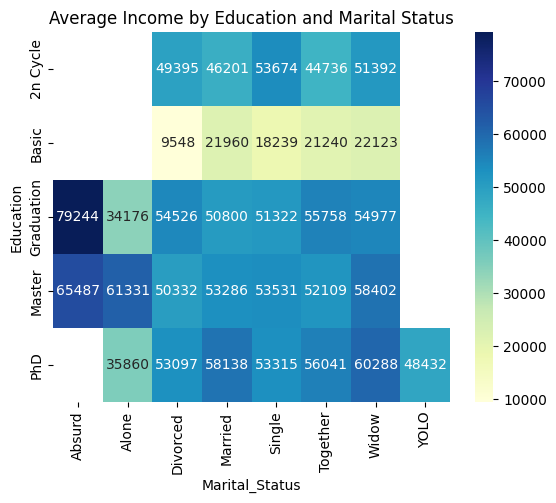

In [46]:
sns.heatmap(pivot_income, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Income by Education and Marital Status")

In [47]:
group1=df.groupby("Education")["Total_Spending"].mean().sort_values(ascending=False)

In [48]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

In [49]:
#barchart

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PhD'),
  Text(1, 0, 'Graduation'),
  Text(2, 0, 'Master'),
  Text(3, 0, '2n Cycle'),
  Text(4, 0, 'Basic')])

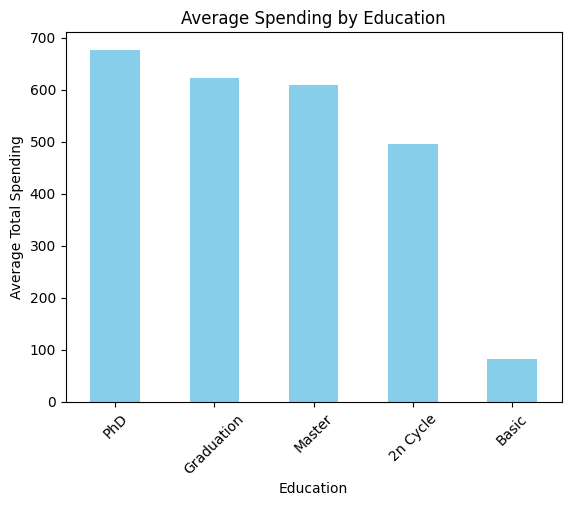

In [50]:
group1.plot(kind="bar",color="skyblue")
plt.title("Average Spending by Education")
plt.ylabel("Average Total Spending")
plt.xticks(rotation=45)

In [51]:
#When you run df["AcceptedAny"].unique(), it gives you all the unique values present in this new column. You see array([1][0][3][2][4][5]) because:

#0: Customers who accepted none of the campaigns or response.

#1: Customers who accepted only one campaign or response.

#2 to 5: Customers who accepted two, three, four, or five.

#The array shows there are no customers who accepted all six (6 isn't present), but all other possible totals are.

#axis=1: Operates across each row (row-wise, horizontally).

In [52]:
df["AcceptedAny"]=df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)

In [53]:
df["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5])

In [54]:
#df["AcceptedAny"]=df["AcceptedAny"].apply(lambda x:1 if x>0 else 0 )

In [55]:
#df["AcceptedAny"].unique()

In [56]:
group2=df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending=False)

In [57]:
group2

Marital_Status
Absurd      1.500000
Alone       0.666667
Widow       0.592105
Single      0.513800
YOLO        0.500000
Divorced    0.500000
Married     0.417736
Together    0.396161
Name: AcceptedAny, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Absurd'),
  Text(1, 0, 'Alone'),
  Text(2, 0, 'Widow'),
  Text(3, 0, 'Single'),
  Text(4, 0, 'YOLO'),
  Text(5, 0, 'Divorced'),
  Text(6, 0, 'Married'),
  Text(7, 0, 'Together')])

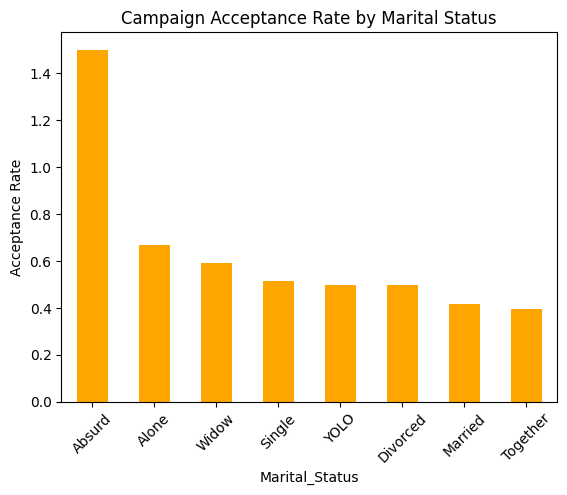

In [58]:
group2.plot(kind="bar",color="orange")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)

In [59]:
bins=[18,30,40,50,60,70,90]

In [60]:
labels=["18-29","30-39","40-49","50-59","60-69","70+"]

In [61]:
df["AgeGroup"]=pd.cut(df["Age"],bins=bins,labels=labels)

In [62]:
df["AgeGroup"]

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [63]:
group3=df.groupby("AgeGroup")["Income"].mean()

C:\Users\vunna\AppData\Local\Temp\ipykernel_16500\1495347196.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3=df.groupby("AgeGroup")["Income"].mean()


In [64]:
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

Text(0.5, 0, 'Average Income')

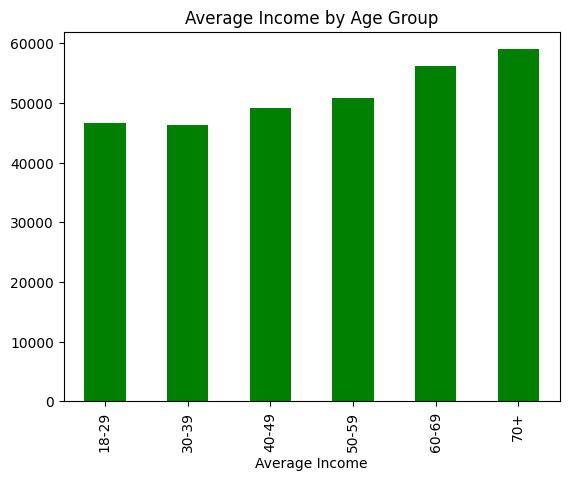

In [65]:
group3.plot(kind="bar",color="green")
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")


In [66]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,4824,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,4274,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,4473,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,4300,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,4322,0,40-49


In [67]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [68]:
#Age - Income-Total_Spending - NumWebPurchases - NumStorePurchases - NumWebVisitsMonth -(Recency is the quality of being recent)

In [69]:
features=["Age","Income","Total_Spending","NumWebPurchases","NumStorePurchases","NumWebVisitsMonth","Recency"]

In [70]:
x=df[features].copy()

In [71]:
x

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print("✅ Scikit-learn is working!")


✅ Scikit-learn is working!


In [73]:
#Each row in the array represents a single sample (e.g., one customer or data entry).

#Each column represents a feature (variable/column) from your original data x.

#Standardization with StandardScaler transforms the data so each feature has a mean of 0 and a standard deviation of 1.

#This is useful for many machine learning algorithms that perform better with standardized data, like KMeans and PCA.

In [74]:
x_scaled=scaler.fit_transform(x)

In [75]:
x_scaled 

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]], shape=(2216, 7))

In [76]:
#ELBOW METHOS wcss-Within-Cluster Sum of Squares

In [77]:
from sklearn.cluster import KMeans

In [78]:
wcss=[]

In [79]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [80]:
wcss #Within-Cluster Sum of Squares

[10218.620143748785,
 9007.786818672808,
 8239.311792375796,
 7567.74824286165,
 7094.608950559737,
 6790.374851554927,
 6442.193147638342,
 5907.244729012]

Text(0, 0.5, 'Wcss')

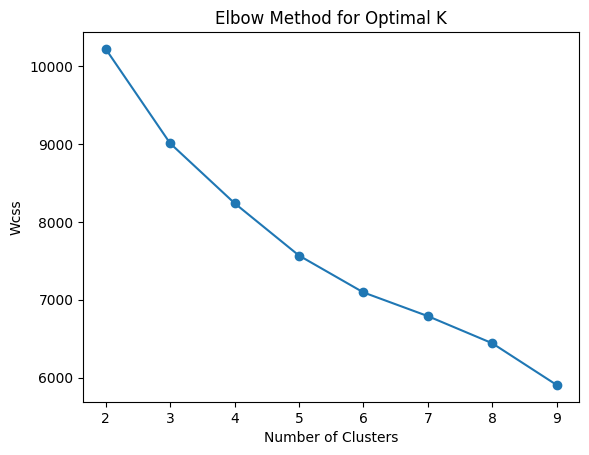

In [81]:
plt.plot(range(2,10),wcss,marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")

In [82]:
kmeans=KMeans(n_clusters=4)
df["Cluster"]=kmeans.fit_predict(x_scaled)

In [83]:
df["Cluster"]

0       2
1       1
2       2
3       1
4       2
       ..
2235    2
2236    2
2237    0
2238    3
2239    1
Name: Cluster, Length: 2216, dtype: int32

In [84]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4824,1,60-69,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4274,0,70+,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4473,0,50-59,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4300,0,40-49,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4322,0,40-49,2


In [85]:
cluster_summary=df.groupby("Cluster")[features].mean()

In [86]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,46.703911,77792.360335,1301.675978,4.723464,8.743017,2.765363,49.254190
1,53.100791,33849.820158,100.124506,2.095850,3.178854,6.540514,49.301383
2,59.452525,57788.488889,792.197980,7.422222,7.389899,6.458586,44.925253
3,70.105413,71421.435897,1099.188034,4.464387,8.119658,2.794872,53.698006


In [87]:
df["Cluster"].value_counts()

Cluster
1    1012
2     495
0     358
3     351
Name: count, dtype: int64

In [88]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_data=pca.fit_transform(x_scaled)
df["PCA1"],df["PCA2"]=pca_data[:,0],pca_data[:,1]

In [89]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]], shape=(2216, 2))

In [90]:
df["PCA1"]

0       1.107519
1      -1.336734
2       1.882277
3      -1.784359
4       0.020363
          ...   
2235    1.248177
2236    0.508708
2237    1.153597
2238    1.887680
2239   -0.841821
Name: PCA1, Length: 2216, dtype: float64

In [91]:
#scatterplot

Text(0.5, 1.0, 'Customer Segmentation (PCA)')

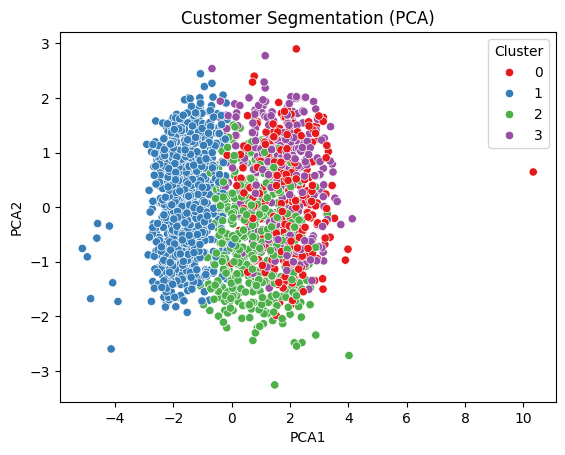

In [92]:
sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster",data=df,palette="Set1")
plt.title("Customer Segmentation (PCA)")

In [266]:
#Cluster 0

#Income range is in between 5000 to 40000 and spending range is in between 0 to 500<br>
# Age range in between 25 to 50
#From any educational level
#Can be married and unmarried as well
#Most of them are parents
#Some have one child
#Customer for at least 300 days
#Promotion acceptance is rare
#Very few complete purchases using discounts

#Cluster 1
#Income range is in between 65000 to 85000 and spending range is in between 550 to 2000
# Age range in between 30 to 60
# Almost all have completed graduation
# Most of them are married
# They are not parents
# Have no child
# Customer for at least 250 day
# Promotion acceptance ratio is 0.5
# Completing purchases using discounts are rare

#Cluster 2
#Income range is in between 50000 to 80000 and spending range is in between 250 to 1800
# Age range in between 35 to 60
# Almost all have completed graduation
# Most of them are married
# They are parents
# All have children, most have one child
# Customer for at least 400 days
# Promotion acceptance ratio is poor
# Highly interested in completing purchases using discounts

#Cluster 3
#Income range is in between 40000 to 60000 and spending range is in between 0 to 500
# Age range in between 40 to 65
# Almost all have completed graduation
# Can be married and unmarried as well
# They are parents
# All have children, most have two children
# Customer for at least 150 days
# Promotion acceptance is rare
# Highly interested in completing purchases using discounts"""

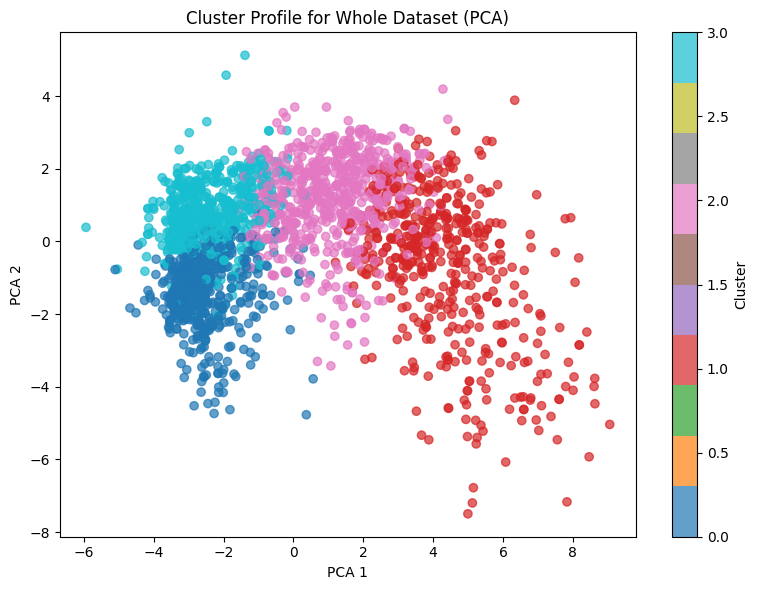

In [93]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select all numeric columns except 'Cluster' if it already exists
X = df.select_dtypes(include='number').drop(columns=['Cluster'], errors='ignore')

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Fit KMeans clustering (adjust n_clusters as needed)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='tab10', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Cluster Profile for Whole Dataset (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()


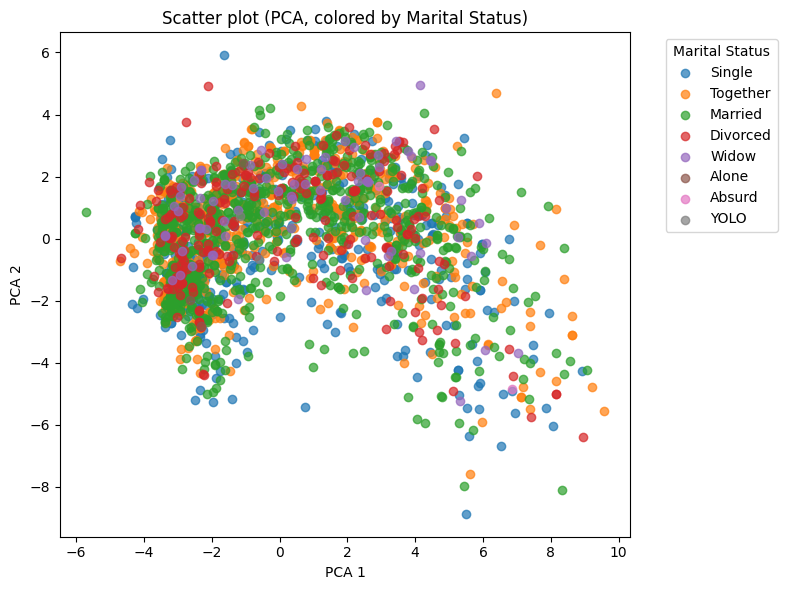

In [94]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select all numeric columns except 'Cluster' if exists
X = df.select_dtypes(include='number').drop(columns=['Cluster'], errors='ignore')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# PCA for 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))

# Color points by marital status
for status in df['Marital_Status'].unique():
    subset = df[df['Marital_Status'] == status]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=status, alpha=0.7)

plt.title("Scatter plot (PCA, colored by Marital Status)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Marital Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


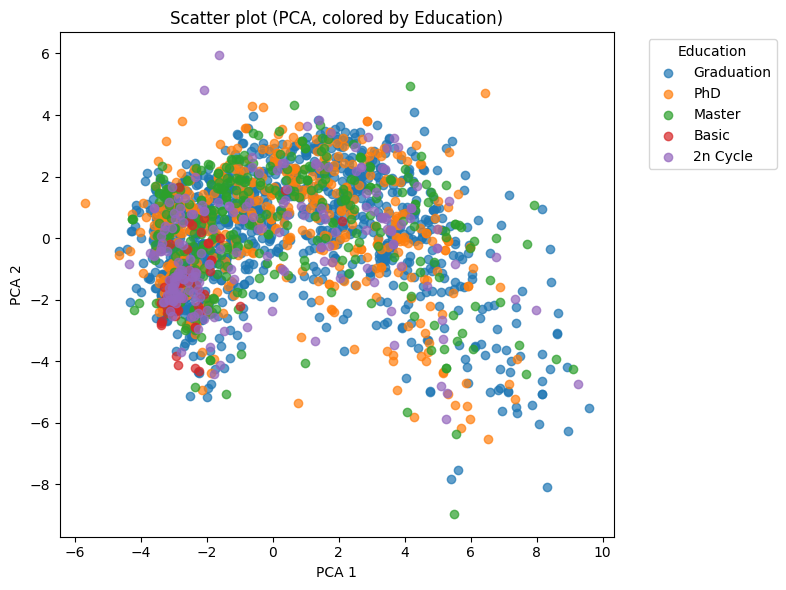

In [95]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select all numeric columns except 'Cluster' if exists
X = df.select_dtypes(include='number').drop(columns=['Cluster'], errors='ignore')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# PCA for 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))

# Color points by marital status
for status in df['Education'].unique():
    subset = df[df['Education'] == status]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=status, alpha=0.7)

plt.title("Scatter plot (PCA, colored by Education)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Education", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [96]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,46.703911,77792.360335,1301.675978,4.723464,8.743017,2.765363,49.254190
1,53.100791,33849.820158,100.124506,2.095850,3.178854,6.540514,49.301383
2,59.452525,57788.488889,792.197980,7.422222,7.389899,6.458586,44.925253
3,70.105413,71421.435897,1099.188034,4.464387,8.119658,2.794872,53.698006


In [97]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [98]:
# OVER ALL HISTOGRAM

Numeric columns: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


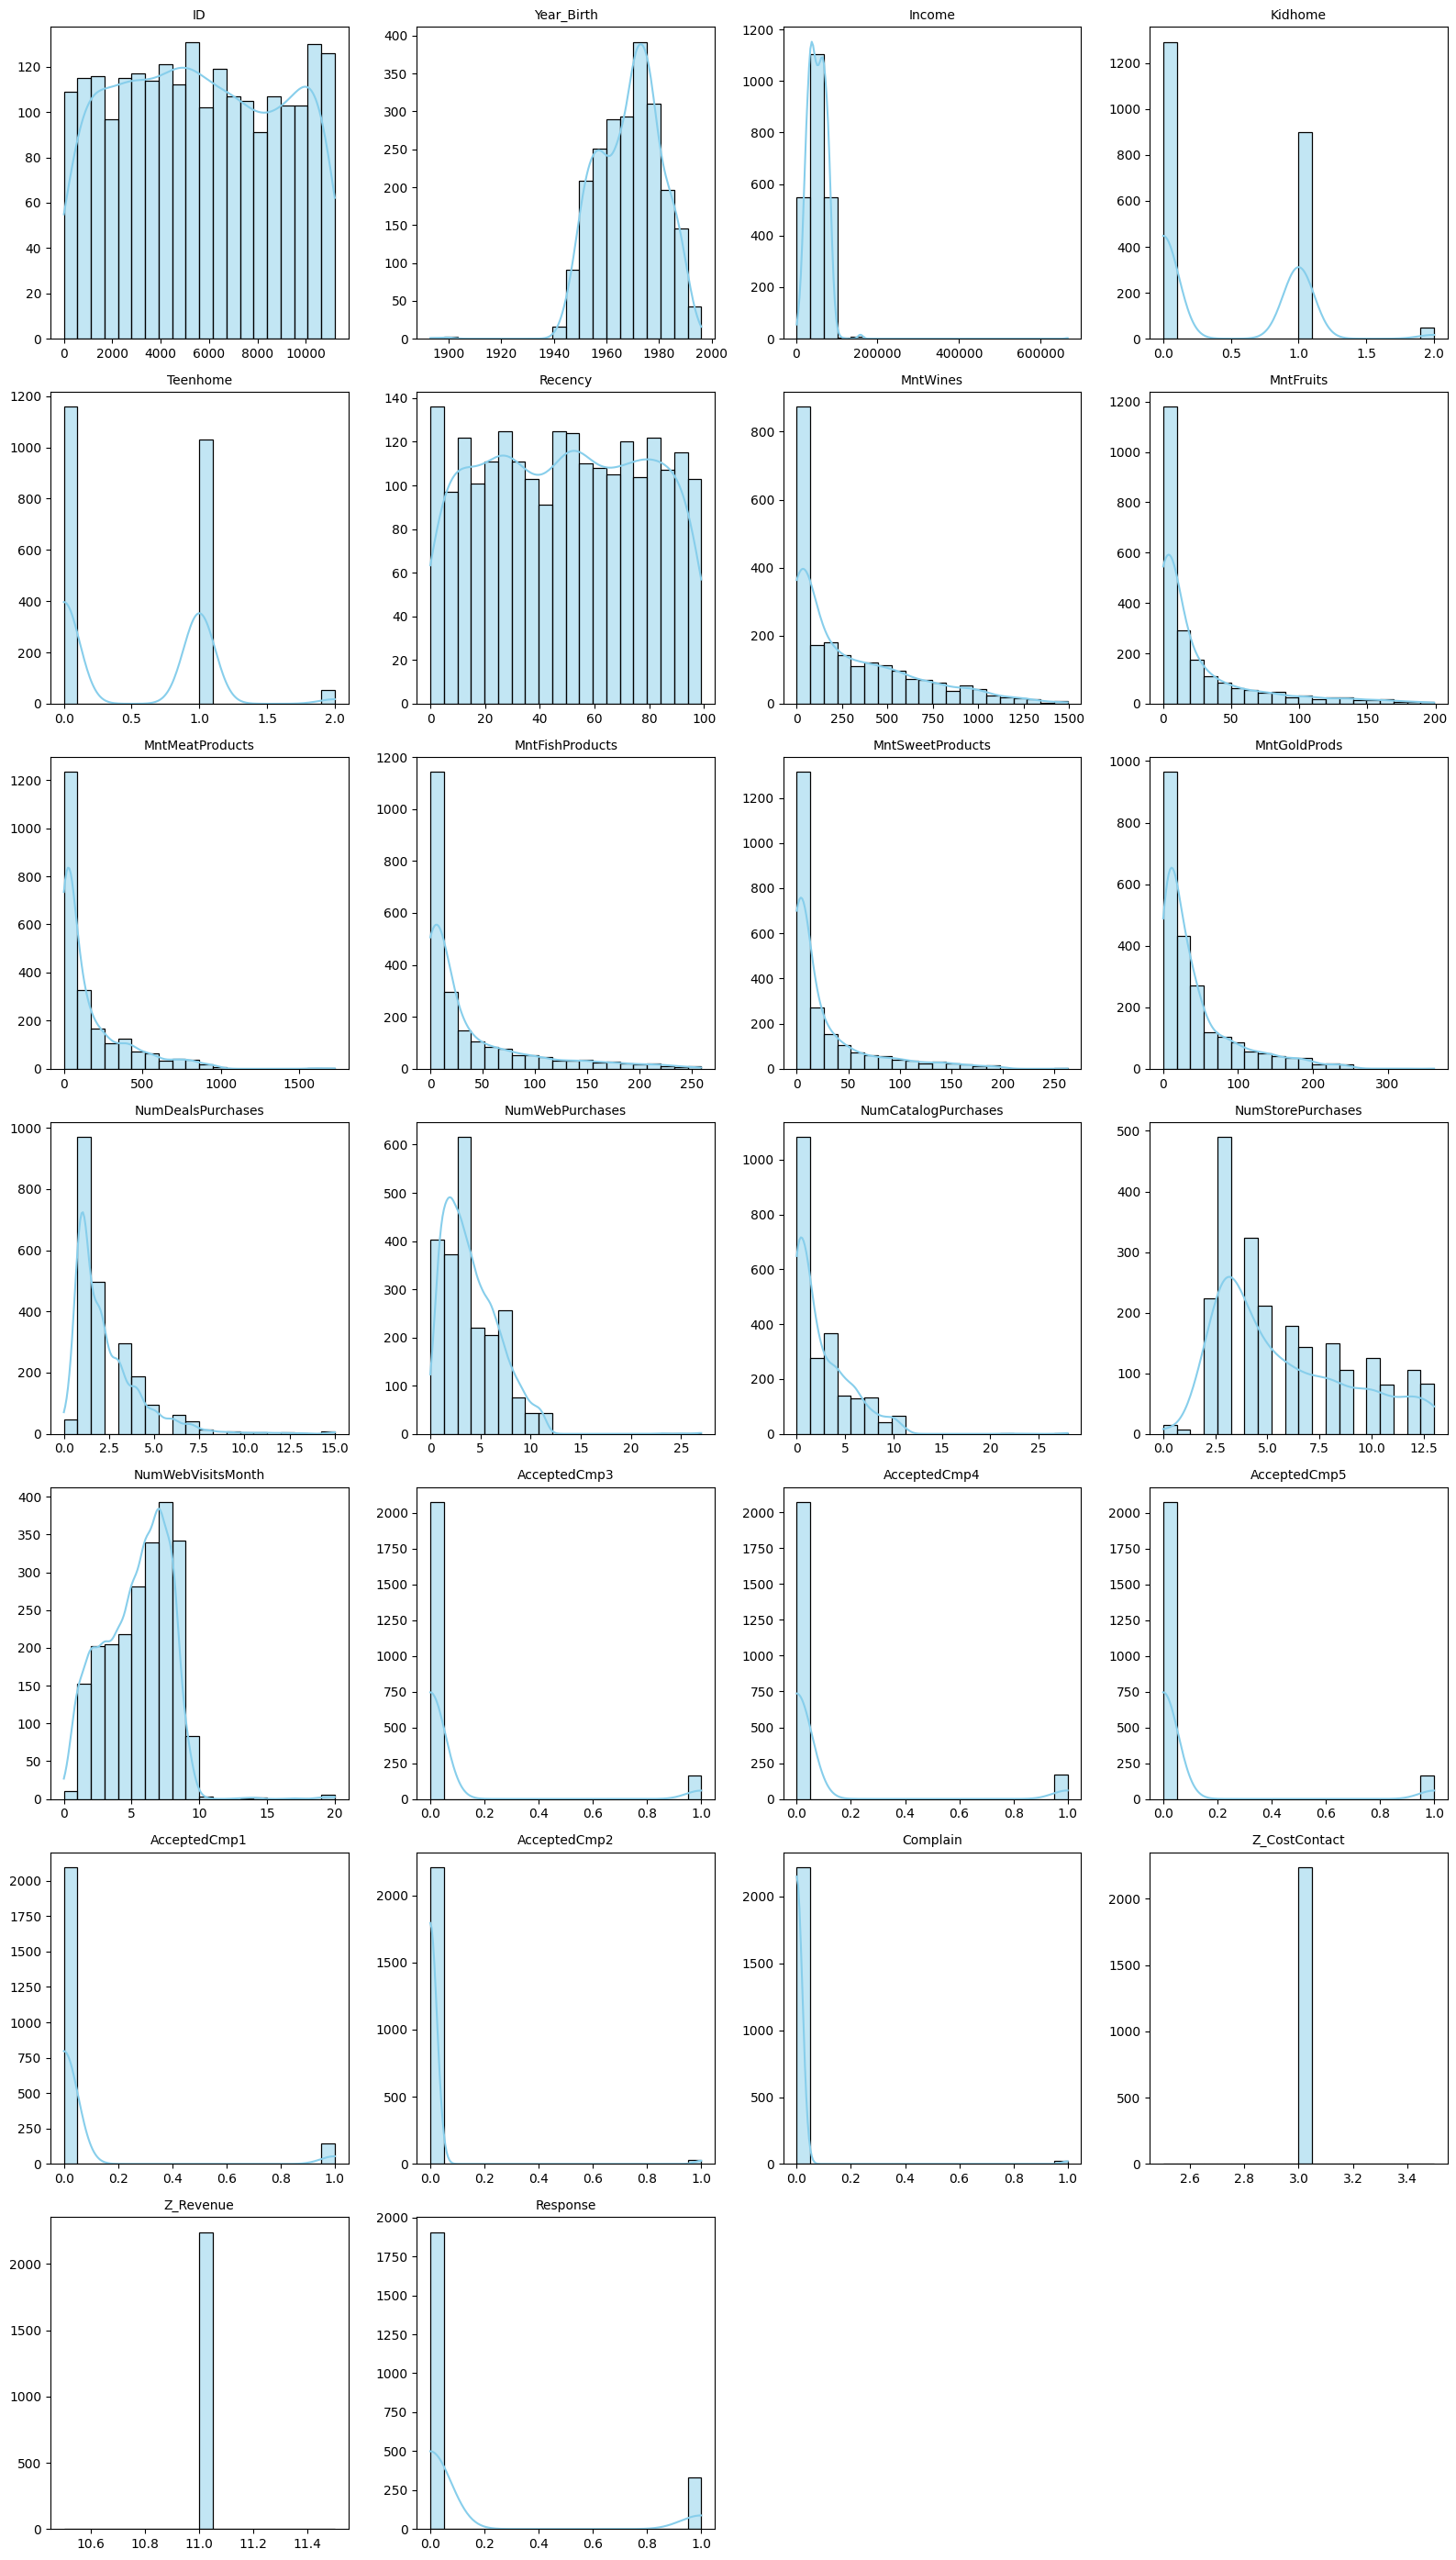

In [99]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

data = pd.read_csv("customer_segmentation.csv") 

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_cols)

num_plots = len(numeric_cols)
cols_per_row = 4
rows = math.ceil(num_plots / cols_per_row)

plt.figure(figsize=(16, 4 * rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(data[col].dropna(), bins=20, kde=True, color='skyblue')
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


In [100]:
df=pd.read_csv("customer_segmentation.csv")

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select all numeric columns except the target
X = df.select_dtypes(include='number').drop(columns=["Response"])
y = df["Response"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100, 2), "%")

Accuracy: 86.83 %


In [102]:
#RANDOM FOREST CLASSIFIER

In [104]:

%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("customer_segmentation.csv")  


df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


features = ['Income', 'Recency', 'Kidhome', 'Teenhome', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'Total_Spending']

X = df[features]

y = df['Response']

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("✅ Best Accuracy:", round(accuracy*100, 2), "%")
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Best Accuracy: 87.5 %

Random Forest Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       381
           1       0.69      0.30      0.42        67

    accuracy                           0.88       448
   macro avg       0.79      0.64      0.67       448
weighted avg       0.86      0.88      0.85       448

Confusion Matrix:
 [[372   9]
 [ 47  20]]


In [ ]:
df=pd.read_csv("customer_segmentation.csv")

In [102]:
#SILHOUESTTE SCORE

In [103]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Use all numeric columns for clustering
X = df.select_dtypes(include='number')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_imputed)

# Evaluate clustering
sil_score = silhouette_score(X_imputed, labels)
dbi_score = davies_bouldin_score(X_imputed, labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {dbi_score:.3f}")


Silhouette Score: 0.489
Davies-Bouldin Index: 0.640


In [104]:
#LOGISTIC REGRESSION

In [106]:
df=pd.read_csv("customer_segmentation.csv")

In [105]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select ALL numeric features (except target/cluster column which doesn't exist yet)
X = df.select_dtypes(include='number')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_imputed)

# Set target variable as cluster labels
y = df['Cluster']

# Split data for classification
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9933035714285714

Confusion Matrix:
 [[174   1   0]
 [  1 131   0]
 [  1   0 140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       175
           1       0.99      0.99      0.99       132
           2       1.00      0.99      1.00       141

    accuracy                           0.99       448
   macro avg       0.99      0.99      0.99       448
weighted avg       0.99      0.99      0.99       448



C:\Users\vunna\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
#dbscan - Density-Based Spatial Clustering of Applications with Noise.DBSCAN is effective for finding clusters of arbitrary shapes and is particularly useful for identifying noise in datasets. 

In [108]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Select ALL numeric features
X = df.select_dtypes(include='number')

# Handle missing values by filling with mean
X = X.fillna(X.mean())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=30)
labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

if n_clusters > 1:
    sil_score = silhouette_score(X_scaled, labels)
    dbi_score = davies_bouldin_score(X_scaled, labels)
    print(f"Silhouette Score: {sil_score:.3f}")
    print(f"Davies–Bouldin Index: {dbi_score:.3f}")
else:
    print("Not enough clusters to compute Silhouette or DB Index.")

print(df.head())


Number of clusters found: 0
Number of noise points: 2240
Not enough clusters to compute Silhouette or DB Index.
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   A

In [110]:
df=pd.read_csv("customer_segmentation.csv")

In [111]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select ALL numeric features for clustering
X_features = df.select_dtypes(include='number')

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_features)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [112]:
X = X_scaled
y = df['Cluster'] 

In [113]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'Cluster' in numeric_cols:
    numeric_cols.remove('Cluster')

X_features = df[numeric_cols]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
if 'Cluster' not in df.columns:
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

X = X_scaled
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)
    
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1 Score: {f1:.3f}\n")

classification_metrics_df = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": [round(a,3) for a in accuracy_scores],
    "Precision": [round(p,3) for p in precision_scores],
    "Recall": [round(r,3) for r in recall_scores],
    "F1 Score": [round(f,3) for f in f1_scores]
})

classification_metrics_df.set_index('Model', inplace=True)

print("\n📊 Classification Metrics Summary:")
print(classification_metrics_df)


Model: Logistic Regression
Accuracy: 0.991, Precision: 0.991, Recall: 0.991, F1 Score: 0.991

Model: SVM
Accuracy: 0.980, Precision: 0.980, Recall: 0.980, F1 Score: 0.980

Model: Decision Tree
Accuracy: 0.953, Precision: 0.954, Recall: 0.953, F1 Score: 0.953

Model: Random Forest
Accuracy: 0.978, Precision: 0.978, Recall: 0.978, F1 Score: 0.978


📊 Classification Metrics Summary:
                     Accuracy  Precision  Recall  F1 Score
Model                                                     
Logistic Regression     0.991      0.991   0.991     0.991
SVM                     0.980      0.980   0.980     0.980
Decision Tree           0.953      0.954   0.953     0.953
Random Forest           0.978      0.978   0.978     0.978


In [114]:
# how ,any attributes u r consider - i have used all the attributes which is numbers means includes all the attributes

In [115]:
 
#* what alogrithms r used
"""KMeans Clustering: Groups customers into clusters based on feature similarity.

Agglomerative Clustering: (Used in some earlier code snippets, for hierarchical clustering.)

DBSCAN Clustering: Detects clusters of varying densities and marks outlier/noise points.

Classification Algorithms
Random Forest Classifier: Ensemble of decision trees, used for classification tasks.

Logistic Regression: Linear classifier, used to predict discrete outcomes (e.g., segment labels).

Decision Tree Classifier: Tree-based model for classification.

Support Vector Machine (SVM): Classifies data using decision boundaries.

Regression/Other Algorithms
(No explicit regression used in your snippets, but Logistic Regression is technically linear classification.)

Preprocessing Algorithms
SimpleImputer: For filling missing values.

StandardScaler: For standardizing feature values.

Evaluation Metrics
Accuracy Score: How often the model predictions are correct.

Precision, Recall, F1 Score: Additional metrics for classification performance.

Silhouette Score: For clustering quality.

Davies-Bouldin Index: For clustering separation."""

# what are the evaluation metrics - random forest,existing_cols
# what is the real time use of u r forest-The real-time use of your customer segmentation project is to help businesses better understand and target their customers through data-driven insights.

'KMeans Clustering: Groups customers into clusters based on feature similarity.\n\nAgglomerative Clustering: (Used in some earlier code snippets, for hierarchical clustering.)\n\nDBSCAN Clustering: Detects clusters of varying densities and marks outlier/noise points.\n\nClassification Algorithms\nRandom Forest Classifier: Ensemble of decision trees, used for classification tasks.\n\nLogistic Regression: Linear classifier, used to predict discrete outcomes (e.g., segment labels).\n\nDecision Tree Classifier: Tree-based model for classification.\n\nSupport Vector Machine (SVM): Classifies data using decision boundaries.\n\nRegression/Other Algorithms\n(No explicit regression used in your snippets, but Logistic Regression is technically linear classification.)\n\nPreprocessing Algorithms\nSimpleImputer: For filling missing values.\n\nStandardScaler: For standardizing feature values.\n\nEvaluation Metrics\nAccuracy Score: How often the model predictions are correct.\n\nPrecision, Recall, F

In [116]:
#on what bases the attributes are takingg
"""In your clustering and scatter plots, attributes (features/columns) are chosen on the basis of including all numeric columns from your DataFrame.

Basis for Attribute Selection:
You use df.select_dtypes(include='number') to automatically select all columns whose data type is numeric (e.g., integer or float).

This means: Any column with numerical data—such as Income, Recency, spending scores, accepted campaigns, etc.—is included in your analysis.

Non-numeric columns (like names, categories, or text) are excluded unless you explicitly convert them to numeric (for example, using one-hot encoding)."""

"In your clustering and scatter plots, attributes (features/columns) are chosen on the basis of including all numeric columns from your DataFrame.\n\nBasis for Attribute Selection:\nYou use df.select_dtypes(include='number') to automatically select all columns whose data type is numeric (e.g., integer or float).\n\nThis means: Any column with numerical data—such as Income, Recency, spending scores, accepted campaigns, etc.—is included in your analysis.\n\nNon-numeric columns (like names, categories, or text) are excluded unless you explicitly convert them to numeric (for example, using one-hot encoding)."

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tkinter import *
import joblib

In [4]:
print(df.columns)


NameError: name 'df' is not defined

In [5]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    
    model = joblib.load('Customer_Segmentation')
    result=model.predict([[p1,p2]])
    print("This Customer belongs to cluster no: ", result[0])
    
    if result[0] == 0:
        Label(master, text="Customers with medium annual income and medium annual spend").grid(row=31)
    elif result[0]==1:
        Label(master, text="Customers with high annual income but low annual spend").grid(row=31)
    elif result[0]==2:
        Label(master, text="Customers with low annual income and low annual spend").grid(row=31)
    elif result[0]==3:
        Label(master, text="Customers low annual income but high annual spend").grid(row=31)
    elif result[0]==4:
        Label(master, text="Customers with high annual income and high annual spend").grid(row=31)

master = Tk()
master.title("Customer Segmentation Using Machine Learning")


label = Label(master, text = "Customer Segmentation Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master,text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)


e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\Users\vunna\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\vunna\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\vunna\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


This Customer belongs to cluster no:  1
This Customer belongs to cluster no:  1
This Customer belongs to cluster no:  1
